In [1]:
import pandas as pd
import preprocessing
import train_lightgbm
import test_lightgbm
import train_onevsrest
import test_onevsrest
import train_rn
import warnings
import os
warnings.filterwarnings("ignore")

ModuleNotFoundError: Optuna's integration modules for third-party libraries have started migrating from Optuna itself to a package called `optuna-integration`. The module you are trying to use has already been migrated to `optuna-integration`. Please install the package by running `pip install optuna-integration`.

In [2]:
study_name = "modelo_text_mining"
os.makedirs("models",exist_ok=True)
os.makedirs("models/lgbm", exist_ok=True)
os.makedirs(f"models/lgbm/{study_name}", exist_ok=True)   

In [3]:
# demora 6 minutos
import importlib 
importlib.reload(preprocessing)
preprocessing.preprocess("dataset.xlsx",study_name, fe=True)


realizando feature engineering


In [4]:
import importlib 
importlib.reload(train_lightgbm)
train_lightgbm.model_lightgbm(study_name,100)

[I 2024-08-24 16:26:41,342] A new study created in RDB with name: modelo_text_mining
[I 2024-08-24 16:26:51,872] Trial 0 finished with value: 0.9431409998810739 and parameters: {'learning_rate': 0.007443044913075553, 'num_leaves': 148, 'max_depth': 3, 'min_child_samples': 27, 'subsample': 0.9981909904729973, 'colsample_bytree': 0.7324554296106973, 'reg_alpha': 0.03025992123050681, 'reg_lambda': 5.7908804557684425e-06}. Best is trial 0 with value: 0.9431409998810739.
[I 2024-08-24 16:27:12,811] Trial 1 finished with value: 0.9714616043328829 and parameters: {'learning_rate': 0.006522433874936375, 'num_leaves': 183, 'max_depth': 11, 'min_child_samples': 25, 'subsample': 0.5790873409256075, 'colsample_bytree': 0.5987798746198884, 'reg_alpha': 3.431890568135396e-05, 'reg_lambda': 0.0005973122755449281}. Best is trial 1 with value: 0.9714616043328829.
[I 2024-08-24 16:27:35,181] Trial 2 finished with value: 0.6802387981363499 and parameters: {'learning_rate': 0.05373559764514991, 'num_leave

#### Falta Curva ROC

Cargando el modelo optimo
Mejores hiperparámetros: {'learning_rate': 0.08831991509732962, 'num_leaves': 177, 'max_depth': 12, 'min_child_samples': 84, 'subsample': 0.5719771863584955, 'colsample_bytree': 0.8184250485412693, 'reg_alpha': 1.2324798043921728e-05, 'reg_lambda': 0.18129354694496094}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5727
[LightGBM] [Info] Number of data points in the train set: 37093, number of used features: 51
[LightGBM] [Info] Start training from score -3.599525
[LightGBM] [Info] Start training from score -2.285823
[LightGBM] [Info] Start training from score -2.026440
[LightGBM] [Info] Start training from score -6.994823
[LightGBM] [Info] Start training from score -6.010324
[LightGBM] [Info] Start training from score -6.190450
[LightGBM] 

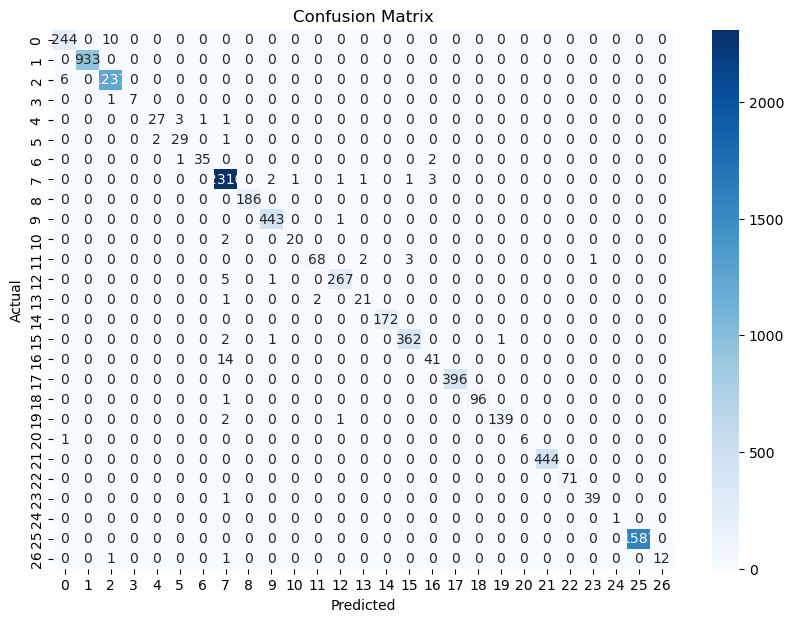

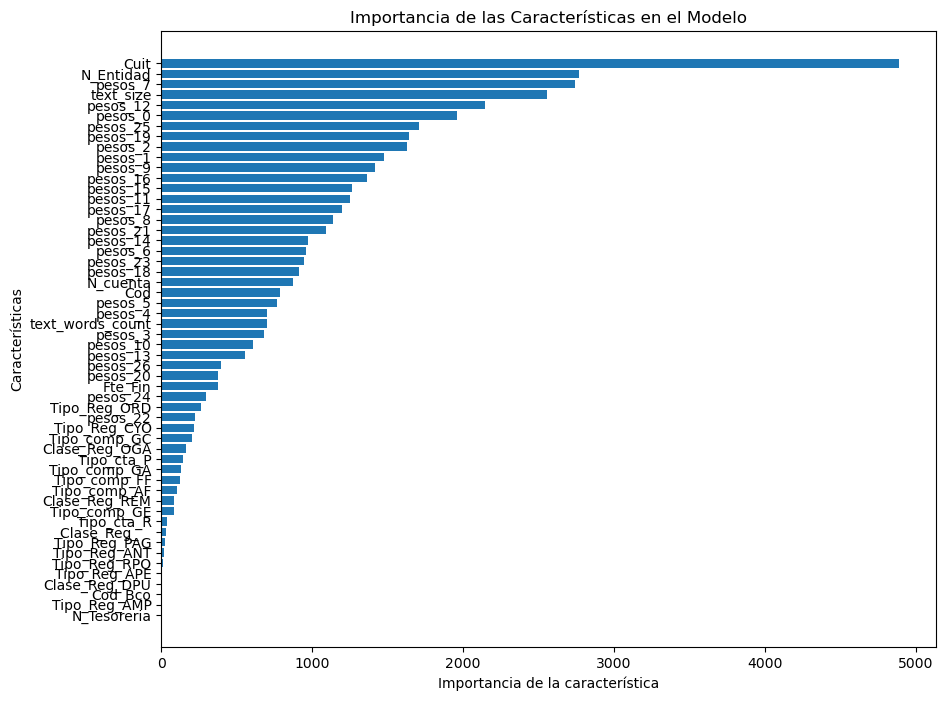

In [5]:
import importlib 
importlib.reload(test_lightgbm)

test_lightgbm.test(study_name)

#### Modelo OnevsRestClassifier con LogisticRegression para Modelo Base

Entrenamos el modelo

In [3]:
import importlib 
study_name = "modelo_base"
importlib.reload(train_onevsrest)
train_onevsrest.model_onevsrest("../datasets/df_train_base.csv", study_name, 100)

[I 2024-08-24 18:25:36,990] A new study created in RDB with name: onevsrest_modelo_base
[I 2024-08-24 18:25:51,010] Trial 0 finished with value: 0.3637800436438769 and parameters: {'C': 0.00028348804566767004, 'solver': 'lbfgs', 'max_iter': 151}. Best is trial 0 with value: 0.3637800436438769.
[I 2024-08-24 18:27:48,734] Trial 1 finished with value: 0.3996083294973658 and parameters: {'C': 12.06856386461068, 'solver': 'newton-cg', 'max_iter': 973}. Best is trial 1 with value: 0.3996083294973658.
[I 2024-08-24 18:27:54,688] Trial 2 finished with value: 0.3457196147249091 and parameters: {'C': 0.0001506637274603758, 'solver': 'liblinear', 'max_iter': 836}. Best is trial 1 with value: 0.3996083294973658.
[I 2024-08-24 18:28:02,283] Trial 3 finished with value: 0.3457196147249091 and parameters: {'C': 0.0014828578126726312, 'solver': 'liblinear', 'max_iter': 216}. Best is trial 1 with value: 0.3996083294973658.
[I 2024-08-24 18:30:15,665] Trial 4 finished with value: 0.399587854563152 and 

KeyboardInterrupt: 

Testeamos el modelo

Cargando el modelo optimo
Mejores hiperparámetros: {'C': 12.06856386461068, 'solver': 'newton-cg', 'max_iter': 973}
Se produjo un error: 'OneVsRestClassifier' object has no attribute 'coef_'
Detalles del error:
Traceback (most recent call last):
  File "c:\Users\Usuario\Documents\Universidad\austral\2024\text_mining\tp-integrador\Text-Mining-Austral\final\test_onevsrest.py", line 93, in test_onevsrest
    coef = best_model.coef_
           ^^^^^^^^^^^^^^^^
AttributeError: 'OneVsRestClassifier' object has no attribute 'coef_'



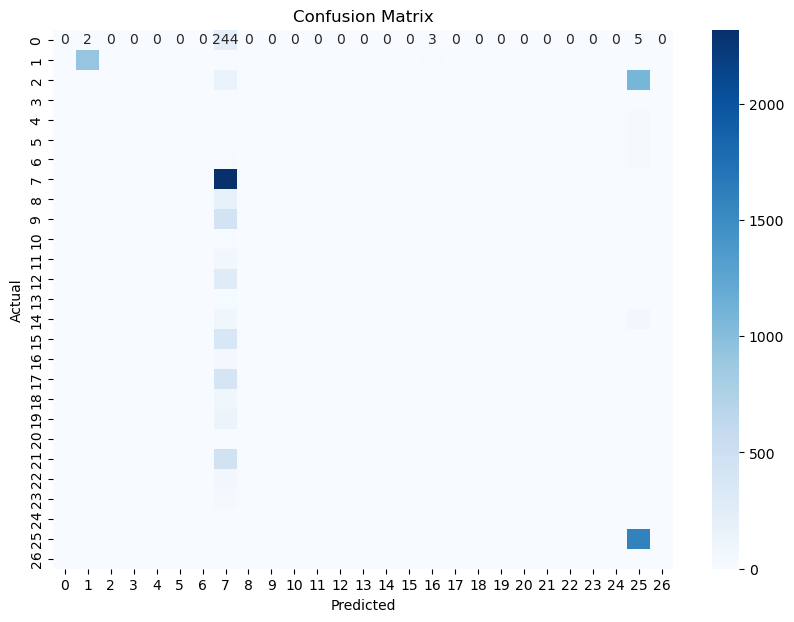

In [10]:
import importlib 
study_name = "modelo_base"
importlib.reload(test_onevsrest)
test_onevsrest.test_onevsrest("../datasets/df_train_base.csv", study_name)

#### Modelo OnevsRestClassifier con LogisticRegression para Modelo Text Mining

Entrenamos el modelo

In [ ]:
import importlib 
study_name = "modelo_text_mining"
importlib.reload(train_onevsrest)
train_onevsrest.model_onevsrest("../datasets/df_train_fe.csv", study_name , 100)

Testeamos el modelo

In [ ]:
import importlib 
study_name = "modelo_text_mining"
importlib.reload(test_onevsrest)
test_onevsrest.test_onevsrest("../datasets/df_train_fe.csv", study_name)

In [63]:
#df = pd.read_csv('../datasets/df_rnn.csv', sep=';')
#df.isna().sum()
import numpy as np
len(np.unique(df.target)) 

27

In [42]:
%%time
import train_rn
import importlib 

study_name = "modelo_text_mining"
importlib.reload(train_rn)
train_rn.train_red_neuronal("../datasets/df_final.csv", study_name, 5)

Epoch 1/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.2358 - loss: 649044426752.0000
Epoch 2/20
462/580 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.2582 - loss: 998932864.0000

KeyboardInterrupt: 

In [72]:
%%time
import train_rn
import importlib 

study_name = "modelo_text_mining"
importlib.reload(train_rn)
train_rn.train_red_neuronal_sin_optuna("../datasets/df_rnn.csv", study_name)

Epoch 1/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 153s 223ms/step - accuracy: 0.1937 - loss: 543270567936.0000 - val_accuracy: 0.2501 - val_loss: 2.8523
Epoch 2/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.2589 - loss: 712413056.0000 - val_accuracy: 0.2501 - val_loss: 2.6115
Epoch 3/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 87s 149ms/step - accuracy: 0.2527 - loss: 570508736.0000 - val_accuracy: 0.2501 - val_loss: 2.5018
Epoch 4/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 105s 181ms/step - accuracy: 0.2560 - loss: 142315072.0000 - val_accuracy: 0.2501 - val_loss: 2.4553
Epoch 5/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 103s 177ms/step - accuracy: 0.2530 - loss: 291967840.0000 - val_accuracy: 0.2501 - val_loss: 2.4353
Epoch 6/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.2534 - loss: 48367784.0000 - val_accuracy: 0.2501 - val_loss: 2.4259
Epoch 7/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 125s 146ms/step - accuracy: 0.2520 - loss: 8686026.0000 - val_accuracy: 0.2501 - val_loss: 2.4209
Epoch 8/20
580/580 ━━━

In [9]:
%%time
import train_rn
import importlib 

study_name = "modelo_text_mining"
importlib.reload(train_rn)
train_rn.model_rnn_optuna_sin_texto("../datasets/df_rnn.csv", study_name, 3)

[I 2024-08-25 21:11:18,029] Using an existing study with name 'rnsborraadsar_modelo_text_mining' instead of creating a new one.


2024-08-25 21:11:17.940932 - Inicio optimizacion de hiperparametros 

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-08-25 21:13:25,170] Trial 3 finished with value: 0.0 and parameters: {'n_layers': 3, 'units_l0': 92, 'units_l1': 122, 'units_l2': 115, 'dropout': 0.4655145354040599, 'learning_rate': 0.004052861666166239, 'epochs': 34}. Best is trial 3 with value: 0.0.


290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-08-25 21:15:39,133] Trial 4 finished with value: 0.0 and parameters: {'n_layers': 3, 'units_l0': 105, 'units_l1': 124, 'units_l2': 122, 'dropout': 0.2026461500794136, 'learning_rate': 0.007488609739909186, 'epochs': 29}. Best is trial 3 with value: 0.0.


290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[I 2024-08-25 21:17:51,199] Trial 5 finished with value: 0.0 and parameters: {'n_layers': 2, 'units_l0': 104, 'units_l1': 92, 'dropout': 0.46835819260504863, 'learning_rate': 0.008836985777966398, 'epochs': 34}. Best is trial 3 with value: 0.0.


Mejores hiperparámetros: {'n_layers': 3, 'units_l0': 92, 'units_l1': 122, 'units_l2': 115, 'dropout': 0.4655145354040599, 'learning_rate': 0.004052861666166239, 'epochs': 34}
Mejor valor de Kappa: 0.0
CPU times: total: 10min 27s
Wall time: 6min 37s


In [43]:
%%time
import train_rn
import importlib 

study_name = "modelo_text_mining"
importlib.reload(train_rn)
train_rn.model_autokeras("../datasets/df.xlsx", study_name, 3)

[2024-08-26 22:39:37.333189] - Leemos el dataset 

[2024-08-26 22:39:37.734516] - Tokenizacion TFIDF 

2024-08-26 22:40:10.567687 - Entrenamos modelo 

Epoch 1/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.2298 - loss: 531732529152.0000 - val_accuracy: 0.2501 - val_loss: 2.8505
Epoch 2/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.2561 - loss: 571716480.0000 - val_accuracy: 0.2501 - val_loss: 2.6116
Epoch 3/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.2521 - loss: 107285064.0000 - val_accuracy: 0.2501 - val_loss: 2.5021
Epoch 4/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 59s 102ms/step - accuracy: 0.2514 - loss: 17778582.0000 - val_accuracy: 0.2501 - val_loss: 2.4556
Epoch 5/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.2531 - loss: 336059744.0000 - val_accuracy: 0.2501 - val_loss: 2.4356
Epoch 6/20
580/580 ━━━━━━━━━━━━━━━━━━━━ 58s 100ms/step - accuracy: 0.2559 - loss: 462008384.0000 - val_accuracy: 0.2501 - val_loss: 2.4260
Epoch 7/20
5

In [24]:
%%time
import train_rf
import importlib 

study_name = "modelo_tfidf"
importlib.reload(train_rf)
train_rf.modelo_tfidf()

[I 2024-08-29 11:32:23,285] Using an existing study with name 'randomforest1234_modelo_tfidf' instead of creating a new one.
[I 2024-08-29 11:34:52,881] Trial 10 finished with value: 0.4353029976277766 and parameters: {'n_estimators': 1000, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 10 with value: 0.4353029976277766.
[I 2024-08-29 11:36:13,105] Trial 11 finished with value: 0.44241966788872117 and parameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 11 with value: 0.44241966788872117.


Mejores hiperparámetros: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}
CPU times: total: 3min 37s
Wall time: 3min 50s


[2024-08-29 11:42:41.171894] - Cargando el modelo optimo 

[2024-08-29 11:42:41.216095] - Mejores hiperparametros: {'n_estimators': 800, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True} 

Kappa en test: 0.9345751303111892
Acurracy en test: 0.9345751303111892
CPU times: total: 19.6 s
Wall time: 21.1 s


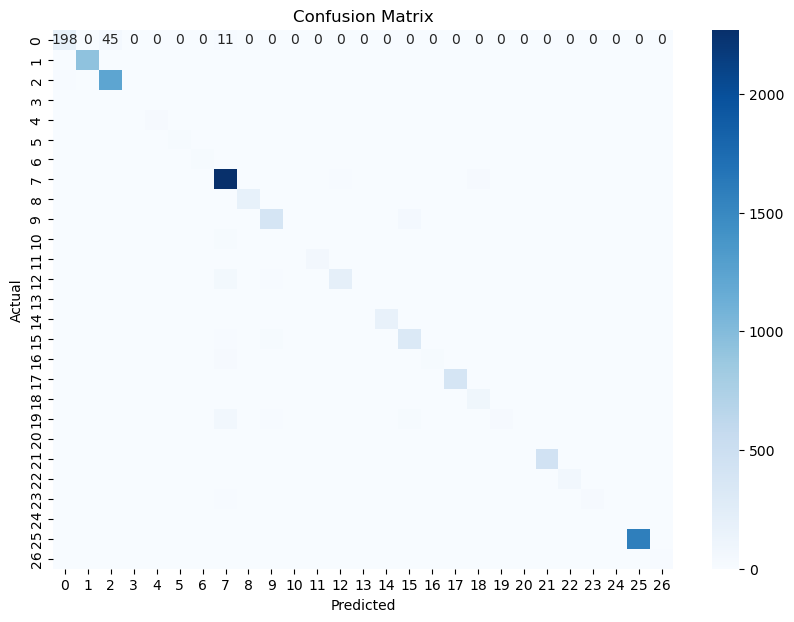

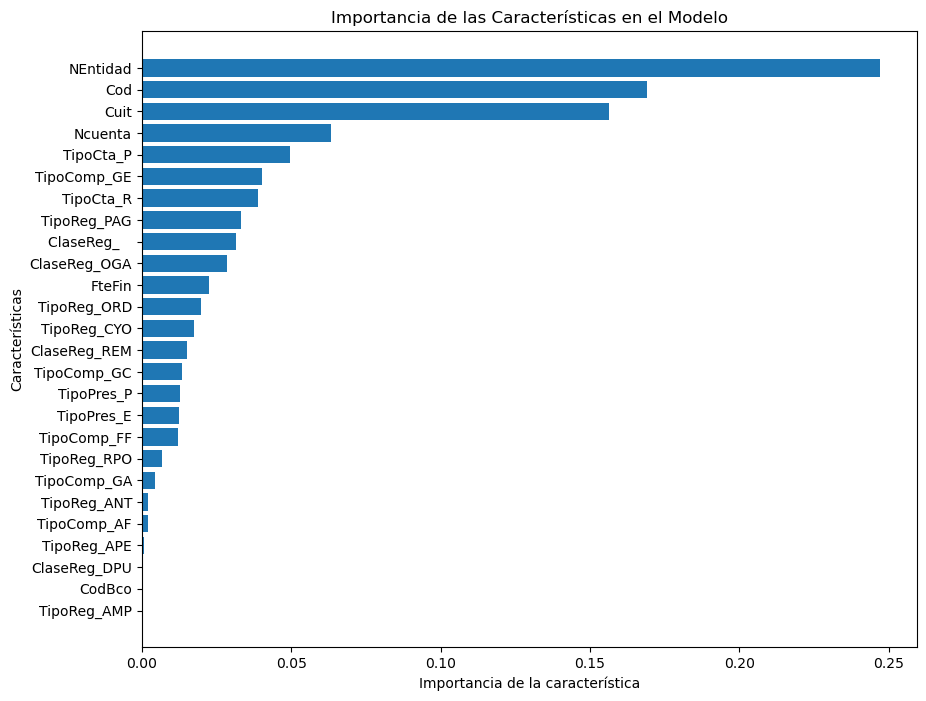

In [26]:
%%time
import test_rf
import importlib
import os 

study_name = "modelo_base"
os.makedirs("models",exist_ok=True)
os.makedirs("models/randomforest", exist_ok=True)
os.makedirs(f"models/randomforest/{study_name}", exist_ok=True)   
importlib.reload(test_rf)
test_rf.modelo_base()

In [1]:
%%time
import train_onevsrest
import importlib
import os 

study_name = "modelo_base" 
importlib.reload(train_onevsrest)
train_onevsrest.modelo_text_mining()

c:\Users\Usuario\.conda\envs\ldi2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-08-29 12:37:39,703] Using an existing study with name 'onevsrest_modelo_text_mining' instead of creating a new one.


#### Mejores modelos: modelo base

LightGBM

In [ ]:

import importlib 
import archivos
from sklearn.model_selection import train_test_split
importlib.reload(archivos)    

SEED = 12345
TEST_SIZE = 0.2
STUDY_NAME="lightgbm_modelo_base"
    
# Leemos
df = archivos.get_modelo_base()

# obtenemos mejor modelo
final_columns = [elemento for elemento in df.columns if elemento != 'target']
X = df[final_columns]
y = df["target"]

# entrenamos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)


# guardamos
    